<a href="https://colab.research.google.com/github/surendiran04/BDA/blob/main/data_Visulaixation_BDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
products_df = pd.read_csv('walmart_dataset_clean.csv')
users_df = pd.read_csv('user.csv')
interactions_df = pd.read_csv('interaction.csv')


# Display previews (optional)
print("Products:", products_df.shape)
print(products_df.columns)
print(products_df.head(1), "\n")

print("Users:", users_df.shape)
print(users_df.columns)
print(users_df.head(1), "\n")

print("Interactions:", interactions_df.shape)
print(interactions_df.columns)
print(interactions_df.head(1), "\n")











Products: (5005, 24)
Index(['Uniq_Id', 'Crawl Timestamp', 'Product_Id',
       'Product Company Type Source', 'Product Brand Source',
       'Product Brand Normalised Source', 'Product Name Source', 'Retailer',
       'Product_Category', 'Product_Brand', 'Product_Name', 'Product_Price',
       'Product Url', 'Market', 'Product_Description', 'Product Currency',
       'Product Available Inventory', 'Product_Image_Url',
       'Product Model Number', 'Product_Tags', 'Product_Rating',
       'Product_Reviews_Count', 'Bsr', 'Joining Key'],
      dtype='object')
                            Uniq_Id            Crawl Timestamp  \
0  1705736792d82aa2f2d3caf1c07c53f4  2020-09-24 03:21:12 +0000   

                         Product_Id Product Company Type Source  \
0  2e17bf4acecdece67fc00f07ad62c910                  Competitor   

  Product Brand Source Product Brand Normalised Source Product Name Source  \
0                  NaN                             NaN                 NaN   

      Retai

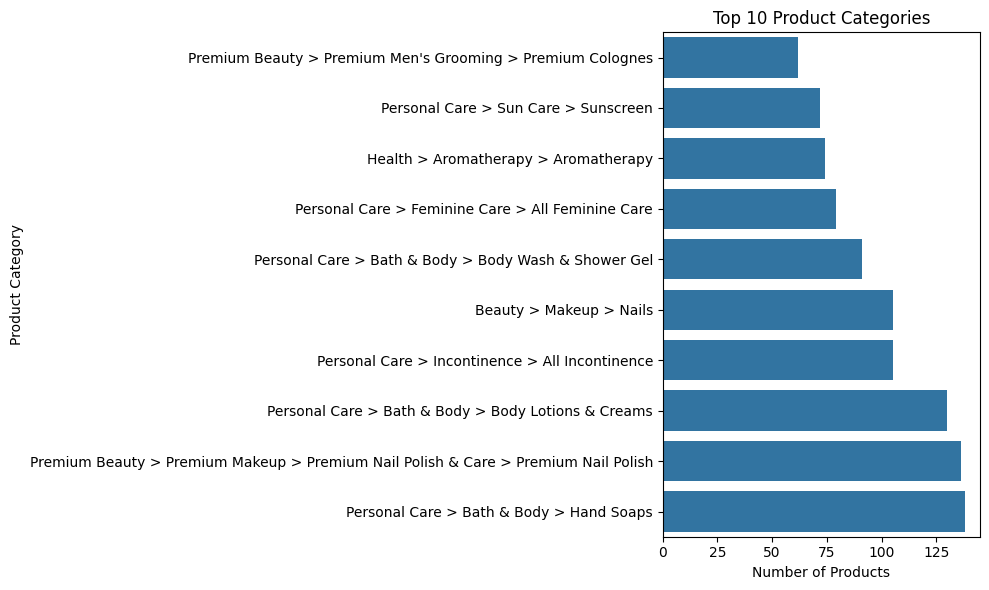

In [21]:
# 1. Top 10 Product Categories (Bar Chart)
plt.figure(figsize=(10,6))
category_counts = products_df['Product_Category'].value_counts().head(10).sort_values()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

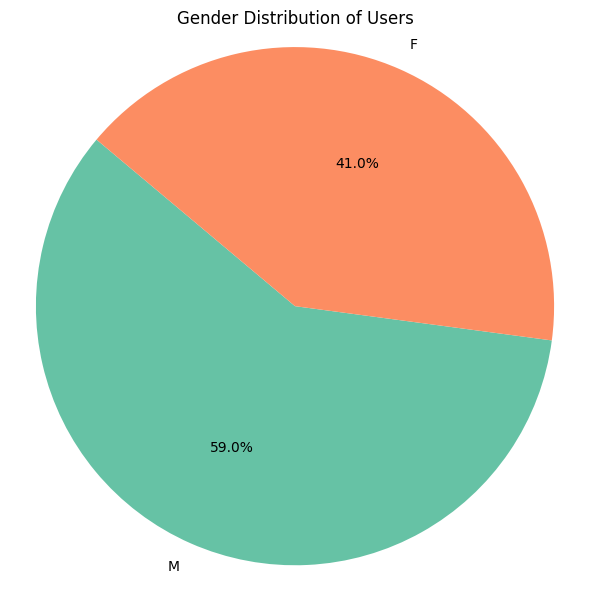

In [18]:
# 2. Gender Distribution of Users (Pie Chart)
gender_counts = users_df['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Gender Distribution of Users')
plt.axis('equal')
plt.tight_layout()
plt.show()

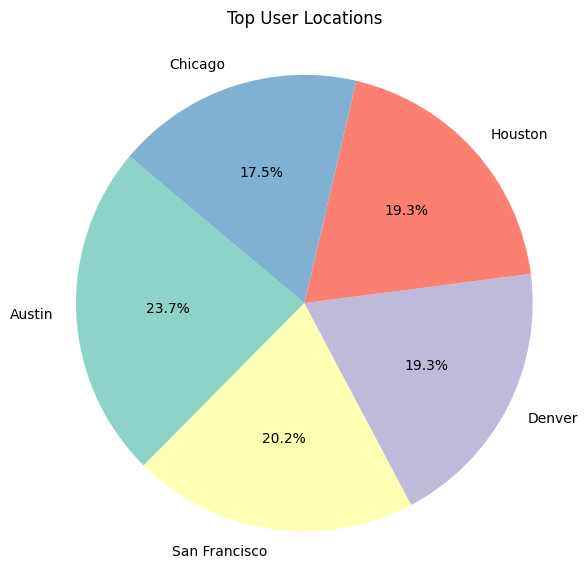

In [19]:
# 3. User Location Trends (Pie Chart)
# Use most frequent location if available
if 'location' in users_df.columns:
    top_locations = users_df['location'].value_counts().head(5)

    plt.figure(figsize=(6,6))
    plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
    plt.title('Top User Locations')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("No 'location' column found in users_df.")

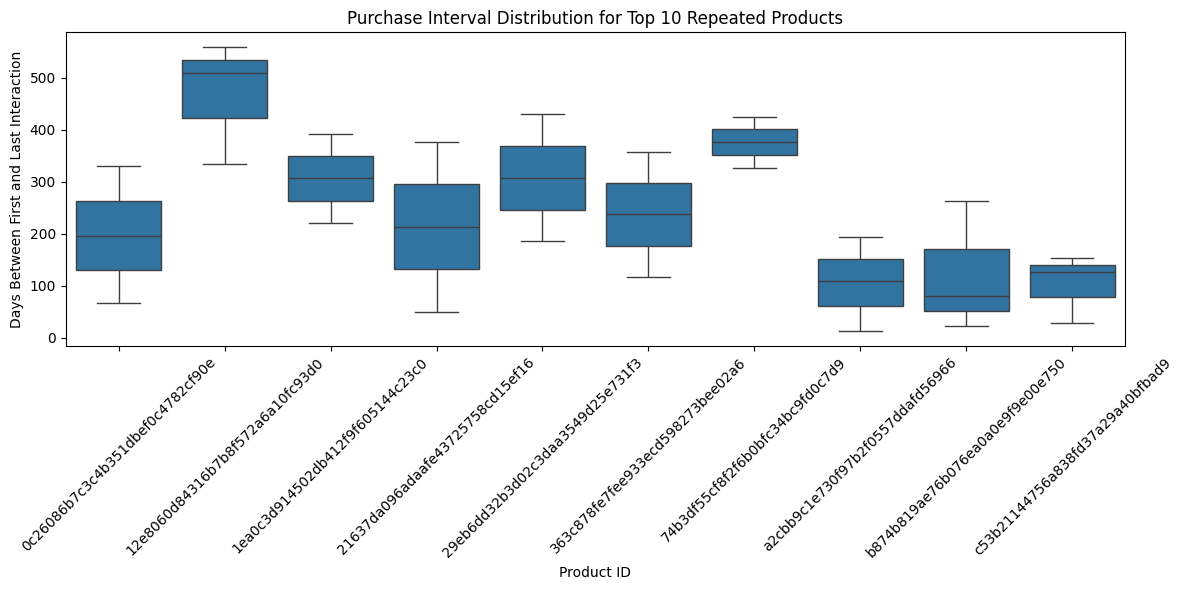

In [20]:
# 4.Time to Purchase – Purchase Interval per Product
interactions_df['timestamp'] = pd.to_datetime(interactions_df['timestamp'])

# Find purchase interval per user-product pair
time_deltas = (
    interactions_df.groupby(['product_id', 'user_id'])['timestamp']
    .agg(['min', 'max'])
    .reset_index()
)
time_deltas['days_diff'] = (time_deltas['max'] - time_deltas['min']).dt.days

# Filter only products with repeated interactions
repeat_intervals = time_deltas[time_deltas['days_diff'] > 0]

# Get top 10 products with most repeated interactions
top_repeat_products = repeat_intervals['product_id'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(x='product_id', y='days_diff', data=repeat_intervals[repeat_intervals['product_id'].isin(top_repeat_products)])
plt.title('Purchase Interval Distribution for Top 10 Repeated Products')
plt.xlabel('Product ID')
plt.ylabel('Days Between First and Last Interaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


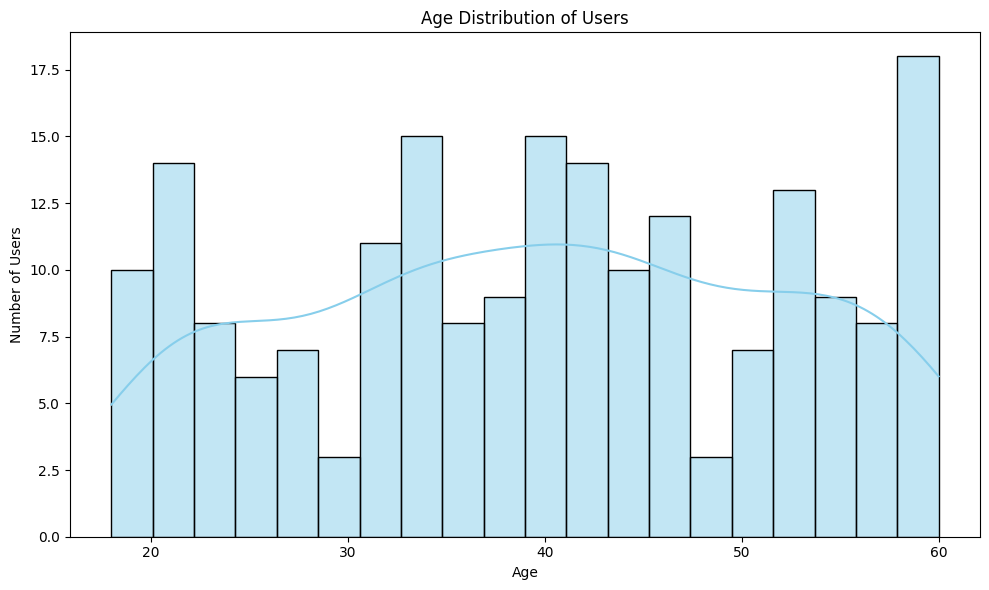

In [17]:
# 5. Age Distribution of Users (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(users_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()